In [2]:
import time
from pyspark.sql import SQLContext
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
sns.color_palette("RdBu")
%matplotlib inline

## Inicialização e carregamento de dados do HDFS

In [3]:
sc = spark.sparkContext
sqlContext = SQLContext(sc)
df = sqlContext.read.option("delimiter", ';').load('hdfs:///user/aksmiyazaki/enem_2016.csv', 
                      format='com.databricks.spark.csv', 
                      header='true', 
                      inferSchema='true')

In [40]:
# Cria uma tabela para consultas.
df.createOrReplaceTempView("table_enem2016")

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


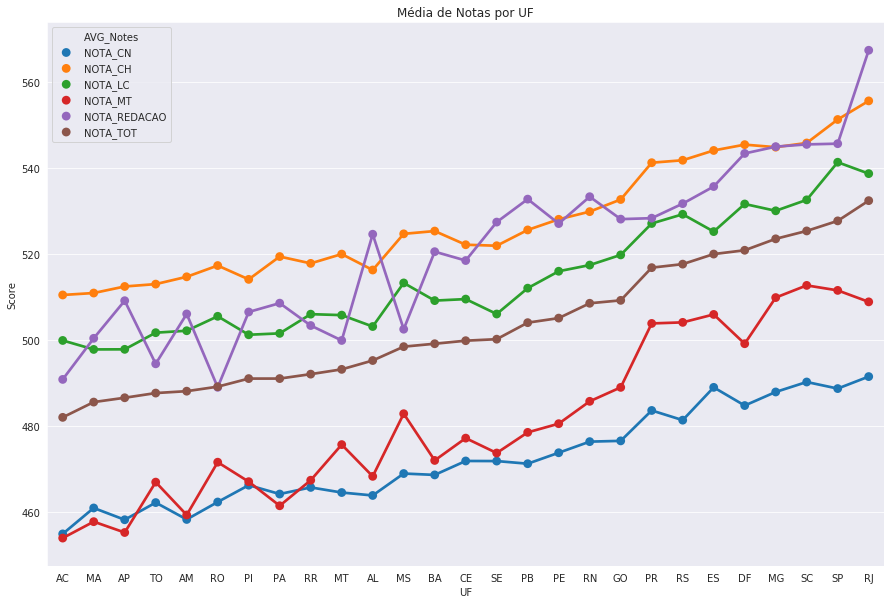

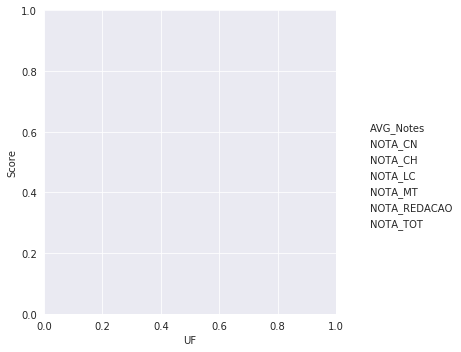

In [5]:
df2 = spark.sql("""Select SG_UF_PROVA as UF, mean(NU_NOTA_CN) as NOTA_CN, 
            mean(NU_NOTA_CH) as NOTA_CH, mean(NU_NOTA_LC) as NOTA_LC, 
            mean(NU_NOTA_MT) as NOTA_MT, mean(NU_NOTA_REDACAO) as NOTA_REDACAO,
            ((mean(NU_NOTA_CN) + mean(NU_NOTA_CH) + mean(NU_NOTA_LC) + mean(NU_NOTA_MT) 
            + mean(NU_NOTA_REDACAO)) / 5) as NOTA_TOT
            from table_enem2016 group by SG_UF_PROVA order by NOTA_TOT""")
pdf = df2.toPandas()
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Média de Notas por UF')
temp_df = pdf.melt('UF', var_name = 'AVG_Notes', value_name='Score')
sns.factorplot(ax=ax, x='UF', y='Score', hue='AVG_Notes', data=temp_df)

In [6]:
pdf.head()

,UF,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_TOT
0,AC,455.025095,510.564675,499.991280,454.053084,490.936817,482.114190
1,MA,461.050875,511.015641,497.906670,457.867896,500.489348,485.666086
2,AP,458.311761,512.538476,497.927517,455.348664,509.229094,486.671102
3,TO,462.303988,513.087827,501.797608,467.058582,494.563661,487.762333
4,AM,458.385581,514.787574,502.250651,459.421541,506.158206,488.200711


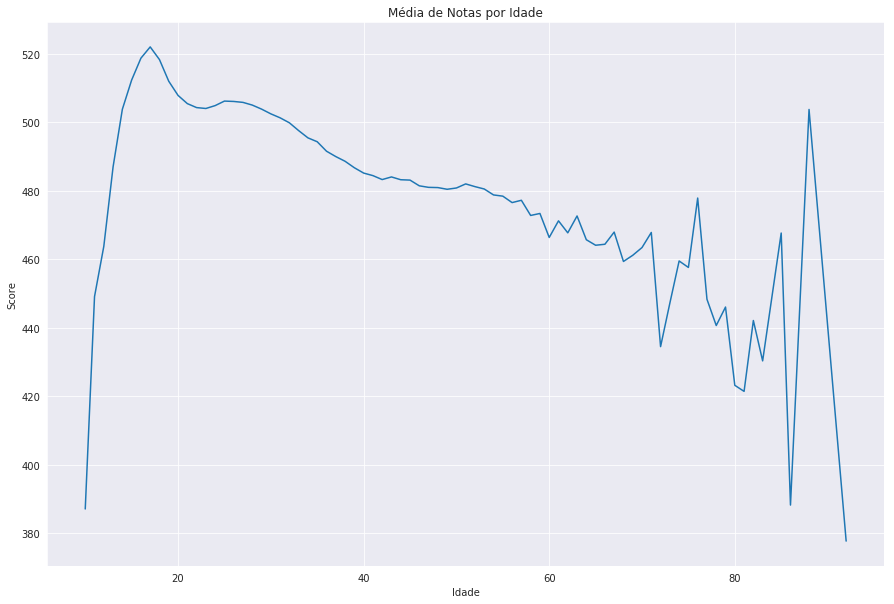

In [7]:
df2 = spark.sql("""Select NU_IDADE as Idade, mean(NU_NOTA_CN) as NOTA_CN, 
            mean(NU_NOTA_CH) as NOTA_CH, mean(NU_NOTA_LC) as NOTA_LC, 
            mean(NU_NOTA_MT) as NOTA_MT, mean(NU_NOTA_REDACAO) as NOTA_REDACAO,
            ((mean(NU_NOTA_CN) + mean(NU_NOTA_CH) + mean(NU_NOTA_LC) + mean(NU_NOTA_MT) 
            + mean(NU_NOTA_REDACAO)) / 5) as Score
            from table_enem2016 group by NU_IDADE order by NU_IDADE""")
pdf = df2.toPandas()
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Média de Notas por Idade')
sns.lineplot(ax=ax, x='Idade', y='Score', data=pdf)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


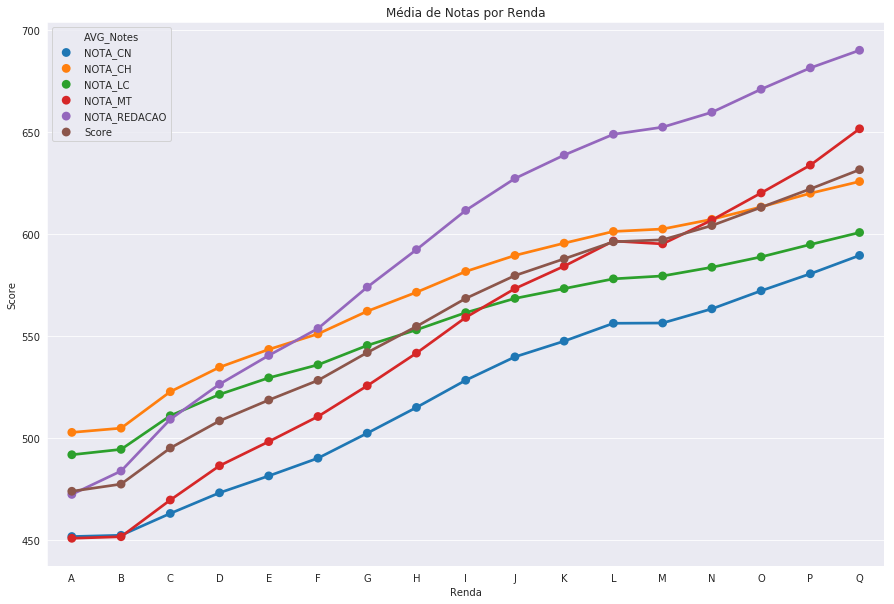

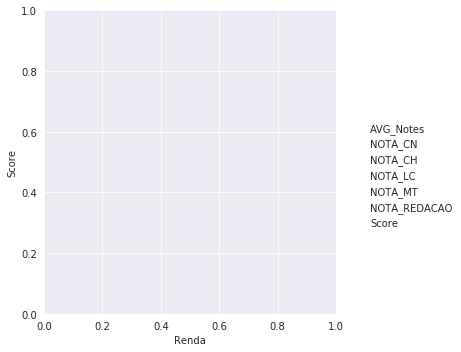

In [8]:
df2 = spark.sql("""Select Q006 as Renda, mean(NU_NOTA_CN) as NOTA_CN, 
            mean(NU_NOTA_CH) as NOTA_CH, mean(NU_NOTA_LC) as NOTA_LC, 
            mean(NU_NOTA_MT) as NOTA_MT, mean(NU_NOTA_REDACAO) as NOTA_REDACAO,
            ((mean(NU_NOTA_CN) + mean(NU_NOTA_CH) + mean(NU_NOTA_LC) + mean(NU_NOTA_MT) 
            + mean(NU_NOTA_REDACAO)) / 5) as Score
            from table_enem2016 group by Q006 order by Q006""")
pdf = df2.toPandas()
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Média de Notas por Renda')
temp_df = pdf.melt('Renda', var_name = 'AVG_Notes', value_name='Score')
sns.factorplot(ax=ax, x='Renda', y='Score', hue='AVG_Notes', data=temp_df)

In [38]:
def parse_sex(ID):
    if ID == 'M':
        return 'Masculino'
    elif ID == 'F':
        return 'Feminino'

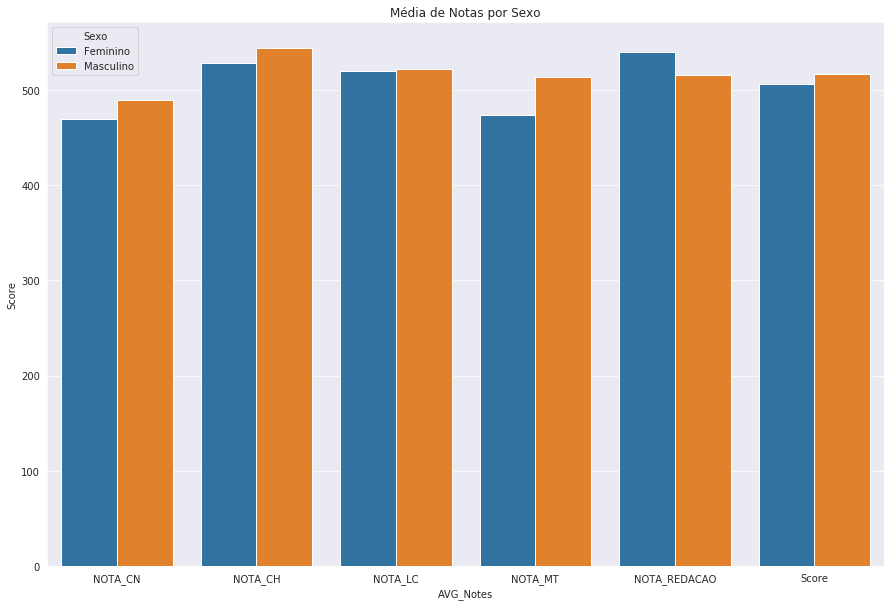

In [41]:
df2 = spark.sql("""Select TP_SEXO as Sexo, mean(NU_NOTA_CN) as NOTA_CN, 
            mean(NU_NOTA_CH) as NOTA_CH, mean(NU_NOTA_LC) as NOTA_LC, 
            mean(NU_NOTA_MT) as NOTA_MT, mean(NU_NOTA_REDACAO) as NOTA_REDACAO,
            ((mean(NU_NOTA_CN) + mean(NU_NOTA_CH) + mean(NU_NOTA_LC) + mean(NU_NOTA_MT) 
            + mean(NU_NOTA_REDACAO)) / 5) as Score
            from table_enem2016 group by Sexo""")
pdf = df2.toPandas()

pdf.dropna(inplace=True)
pdf['Sexo'] = pdf['Sexo'].apply(parse_sex)

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Média de Notas por Sexo')
temp_df = pdf.melt('Sexo', var_name = 'AVG_Notes', value_name='Score')
sns.barplot(ax=ax, x='AVG_Notes', y='Score', hue='Sexo', data=temp_df)

In [18]:
df2 = spark.sql("""Select TP_ESTADO_CIVIL as Estado_Civil, mean(NU_NOTA_CN) as NOTA_CN, 
            mean(NU_NOTA_CH) as NOTA_CH, mean(NU_NOTA_LC) as NOTA_LC, 
            mean(NU_NOTA_MT) as NOTA_MT, mean(NU_NOTA_REDACAO) as NOTA_REDACAO,
            ((mean(NU_NOTA_CN) + mean(NU_NOTA_CH) + mean(NU_NOTA_LC) + mean(NU_NOTA_MT) 
            + mean(NU_NOTA_REDACAO)) / 5) as Score
            from table_enem2016 group by TP_ESTADO_CIVIL""")
pdf = df2.toPandas()

In [29]:
def parse_estado_civil(num):
    if num == 0:
        return 'Solteiro(a)'
    elif num == 1:
        return 'Casado/União Estável'
    elif num == 2:
        return 'Divorciado/Separado'
    elif num == 3:
        return 'Viúvo(a)'

In [32]:
pdf.dropna(inplace=True)
pdf['Estado_Civil'] = pdf['Estado_Civil'].apply(parse_estado_civil)

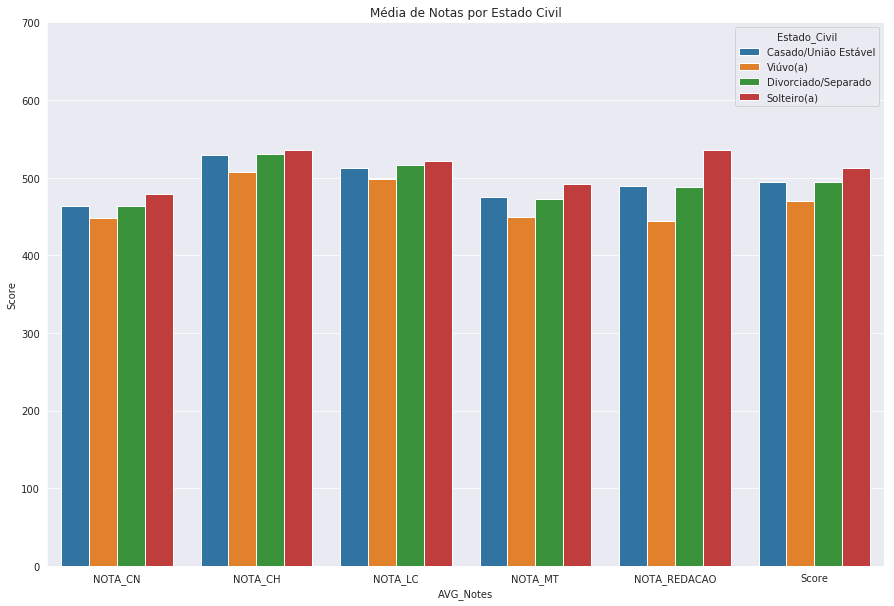

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Média de Notas por Estado Civil')
plt.ylim(0, 700)
temp_df = pdf.melt('Estado_Civil', var_name = 'AVG_Notes', value_name='Score')
sns.barplot(ax=ax, x='AVG_Notes', y='Score', hue='Estado_Civil', data=temp_df)